## Objective:- Predict vehicle price based on it's specifications

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math  

############# Skewness
from scipy.stats import skew

## Data Import

In [2]:
electric = pd.read_csv(r"C:\Users\HP\Desktop\Python\Machine Learning\Mini Project\Electric vehicles2\ElectricCarData_Clean.csv") 
electric

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


### Data Type

In [3]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [4]:
electric = electric.drop(['Brand','Model','FastCharge_KmH','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment','Seats'],axis = 1)
electric

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
0,4.6,233,450,161,55480
1,10.0,160,270,167,30000
2,4.7,210,400,181,56440
3,6.8,180,360,206,68040
4,9.5,145,170,168,32997
...,...,...,...,...,...
98,7.5,160,330,191,45000
99,4.5,210,335,258,96050
100,5.9,200,325,194,50000
101,5.1,200,375,232,65000


In [5]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccelSec         103 non-null    float64
 1   TopSpeed_KmH     103 non-null    int64  
 2   Range_Km         103 non-null    int64  
 3   Efficiency_WhKm  103 non-null    int64  
 4   PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.1 KB


AccelSec
1.227099878770524


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


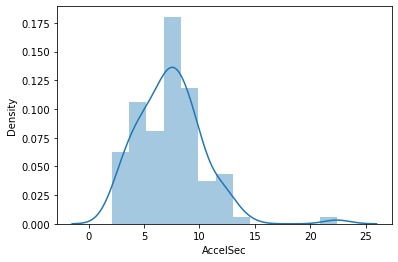

TopSpeed_KmH
1.872052416109607


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


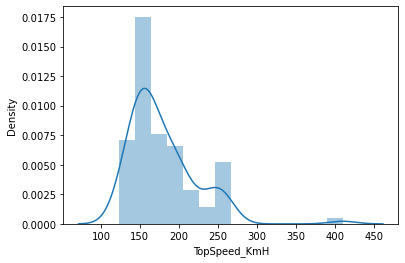

Range_Km
1.3587965250859557


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


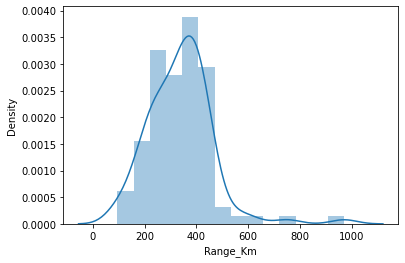

Efficiency_WhKm
0.8588221995026588


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


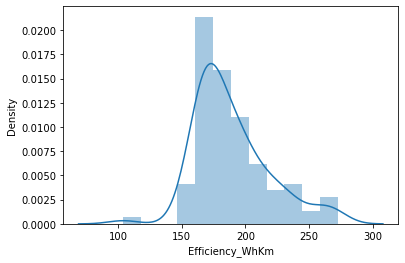

PriceEuro
2.189441177489707


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


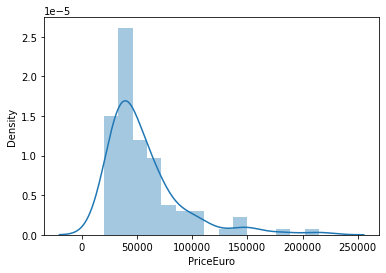

In [6]:
for col in electric:
    print(col)
    print(skew(electric[col]))
    
    plt.figure()
    sns.distplot(electric[col])
    plt.show()

In [7]:
#electric["AccelSec"] = np.cbrt(electric["AccelSec"])
#electric["TopSpeed_KmH"] = np.cbrt(electric["TopSpeed_KmH"])
#electric["Range_Km"] = np.cbrt(electric["Range_Km"])

#for col in electric:
    #print(col)
    #print(skew(electric[col]))
    
    #plt.figure()
    #sns.distplot(electric[col])
    #plt.show()

###  Univariate analysis

In [8]:
electric.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,55811.563107
std,3.017430,43.573030,126.014444,29.566839,34134.665280
min,2.100000,123.000000,95.000000,104.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,215000.000000


### EDA 
Identification & treatemnet of outliers

<AxesSubplot:>

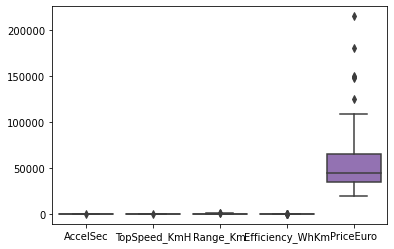

In [9]:
sns.boxplot(data = electric)

## Winsorizing Technique -- Treatment Of Outlier 

In [10]:
electric.columns

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceEuro'], dtype='object')

In [11]:
q1 = electric['AccelSec'].quantile(0.25)
q3 = electric['AccelSec'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

14.850000000000001
-0.7500000000000009


<AxesSubplot:>

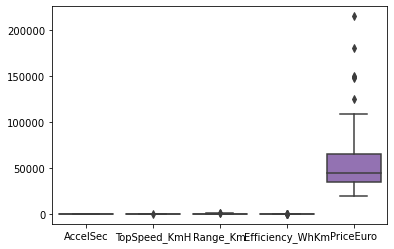

In [12]:
electric['AccelSec']=np.where(electric['AccelSec'] > upper_limit,upper_limit,electric['AccelSec']) # upper limit
electric['AccelSec']=np.where(electric['AccelSec'] < lower_limit,upper_limit,electric['AccelSec']) # lower limit

sns.boxplot(data=electric)

275.0
75.0


<AxesSubplot:>

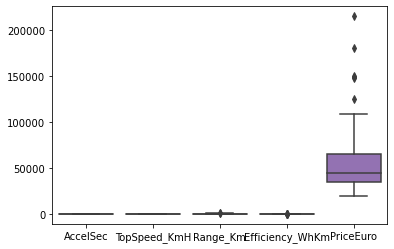

In [13]:
q1 = electric['TopSpeed_KmH'].quantile(0.25)
q3 = electric['TopSpeed_KmH'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

electric['TopSpeed_KmH']=np.where(electric['TopSpeed_KmH'] > upper_limit,upper_limit,electric['TopSpeed_KmH']) # upper limit
electric['TopSpeed_KmH']=np.where(electric['TopSpeed_KmH'] < lower_limit,upper_limit,electric['TopSpeed_KmH']) # lower limit

sns.boxplot(data=electric)

625.0
25.0


<AxesSubplot:>

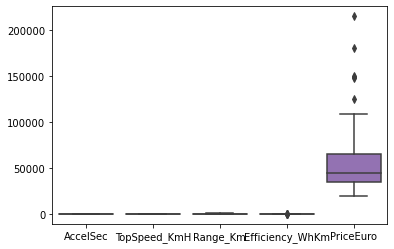

In [14]:
q1 = electric['Range_Km'].quantile(0.25)
q3 = electric['Range_Km'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

electric['Range_Km']=np.where(electric['Range_Km'] > upper_limit,upper_limit,electric['Range_Km']) # upper limit
electric['Range_Km']=np.where(electric['Range_Km'] < lower_limit,upper_limit,electric['Range_Km']) # lower limit

sns.boxplot(data=electric)

255.5
115.5


<AxesSubplot:>

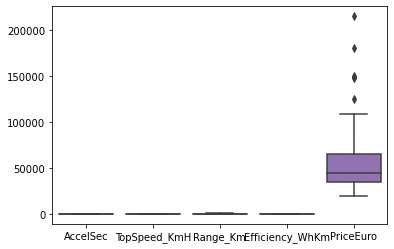

In [15]:
q1 = electric['Efficiency_WhKm'].quantile(0.25)
q3 = electric['Efficiency_WhKm'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

electric['Efficiency_WhKm']=np.where(electric['Efficiency_WhKm'] > upper_limit,upper_limit,electric['Efficiency_WhKm']) # upper limit
electric['Efficiency_WhKm']=np.where(electric['Efficiency_WhKm'] < lower_limit,upper_limit,electric['Efficiency_WhKm']) # lower limit

sns.boxplot(data=electric)

110855.75
-11426.25


<AxesSubplot:>

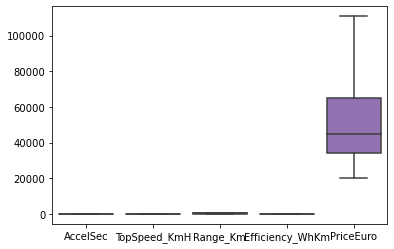

In [16]:
q1 = electric['PriceEuro'].quantile(0.25)
q3 = electric['PriceEuro'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
lower_limit = q1-1.5*iqr
print(upper_limit)
print(lower_limit)

electric['PriceEuro']=np.where(electric['PriceEuro'] > upper_limit,upper_limit,electric['PriceEuro']) # upper limit
electric['PriceEuro']=np.where(electric['PriceEuro'] < lower_limit,upper_limit,electric['PriceEuro']) # lower limit

sns.boxplot(data=electric)

## missing value 

In [17]:
electric.isnull().sum()

AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
PriceEuro          0
dtype: int64

<AxesSubplot:xlabel='PriceEuro', ylabel='Count'>

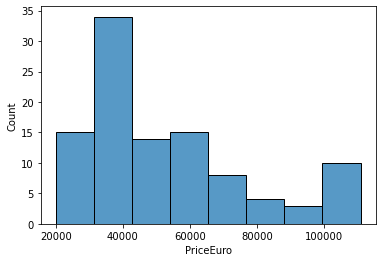

In [18]:
sns.histplot(electric['PriceEuro'])

In [19]:
electric["PriceEuro"] = np.log(electric["PriceEuro"])

## Splitting the data into train and test set

* Using sklearn we split 70% of our data into tarining set and 30% data into testing set.
* Setting random_state will give the same training and test set everytime on running the code.

In [20]:
# Putting feature variable to X
X = electric.drop('PriceEuro', axis= 1)

# Putting response variable to y
y = electric[['PriceEuro']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=100)

In [21]:
df = pd.concat([y_train, X_train], axis=1)
df

,PriceEuro,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm
33,11.225243,3.0,210.0,625.0,255.5
6,10.370361,9.6,150.0,190.0,168.0
3,11.127851,6.8,180.0,360.0,206.0
12,10.616315,7.9,167.0,400.0,160.0
70,10.634075,6.9,160.0,230.0,165.0
...,...,...,...,...,...
79,11.615985,3.2,260.0,390.0,215.0
87,11.149816,6.8,190.0,295.0,219.0
67,10.915088,5.0,190.0,460.0,255.5
24,11.026467,3.4,261.0,435.0,167.0


### Correlation Matrix 

In [22]:
electric.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
AccelSec,1.000000,-0.889307,-0.743686,-0.395103,-0.817311
TopSpeed_KmH,-0.889307,1.000000,0.693793,0.368333,0.850655
Range_Km,-0.743686,0.693793,1.000000,0.440630,0.747252
Efficiency_WhKm,-0.395103,0.368333,0.440630,1.000000,0.671265
PriceEuro,-0.817311,0.850655,0.747252,0.671265,1.000000


<AxesSubplot:>

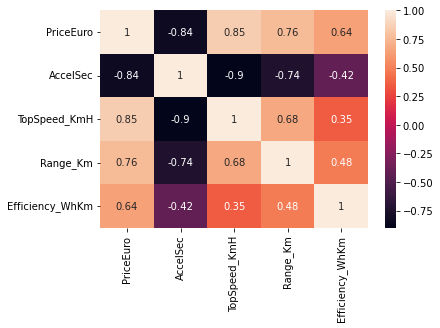

In [23]:
sns.heatmap(np.round(df.corr(),2),annot = True)

<AxesSubplot:title={'center':'Price VS Acceleration in sec'}, xlabel='PriceEuro', ylabel='AccelSec'>

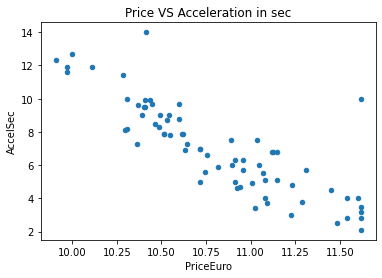

In [24]:
df.plot.scatter(x='PriceEuro',y='AccelSec',title='Price VS Acceleration in sec')

<AxesSubplot:title={'center':'Price VS TopSpeed_KmH'}, xlabel='PriceEuro', ylabel='TopSpeed_KmH'>

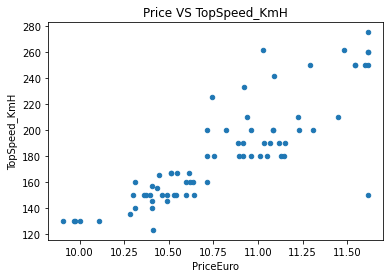

In [25]:
df.plot.scatter(x='PriceEuro',y='TopSpeed_KmH',title='Price VS TopSpeed_KmH')

PriceEuro have 84% strong positive correlation with TopSpeed_KmH.

PriceEuro have 76% strong negative correlation with AccelSec.

Multi-colinearity present in the dataset.

#  Multicollinearity (with the help of VIF)

In [26]:
X1=df.drop(['PriceEuro','Efficiency_WhKm','TopSpeed_KmH'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

AccelSec    2.805188
Range_Km    2.805188
dtype: float64

No Collinearity in the data.

## Model Builiding 
* Ho - There is no linear relationship between PriceEuro and AccelSec & Range_Km.
* vs
* Ho - There is a linear relationship between PriceEuro and AccelSec & Range_Km.
* alpha = 5%(0.05)

In [27]:
import statsmodels.formula.api as smf
model = smf.ols('PriceEuro ~ AccelSec + Range_Km',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     103.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.70e-21
Time:                        19:00:42   Log-Likelihood:                 5.3654
No. Observations:                  72   AIC:                            -4.731
Df Residuals:                      69   BIC:                             2.099
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1357      0.210     52.935      0.000      10.716      11.555
AccelSec      -0.1032      0.015     -7.036      0.000      -0.132      -0.074
Range_Km       0.0012      0.000      3.325      0.001       0.000       0.002
==============================================================================
Omnibus:                       15.825   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.287
Skew:                           1.061   Prob(JB):                     0.000107
Kurtosis:                       4.263   Cond. No.                     2.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Manual prediction 
##### y = 11.1357 + (-0.1032)*AccelSec + 0.0012 * Range_Km

In [28]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

,PriceEuro,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,fitted_value,residual
33,11.225243,3.0,210.0,625.0,255.5,11.567594,-0.342350
6,10.370361,9.6,150.0,190.0,168.0,10.370259,0.000102
3,11.127851,6.8,180.0,360.0,206.0,10.860962,0.266889
12,10.616315,7.9,167.0,400.0,160.0,10.794881,-0.178567
70,10.634075,6.9,160.0,230.0,165.0,10.696402,-0.062327


## Assumption of model.
* Linearity 
* Normality 
* Homoscedasticity 
* Model error has to be independently identically distributed.

# Linearity

<AxesSubplot:title={'center':'Price vs efficiency'}, xlabel='Efficiency_WhKm', ylabel='PriceEuro'>

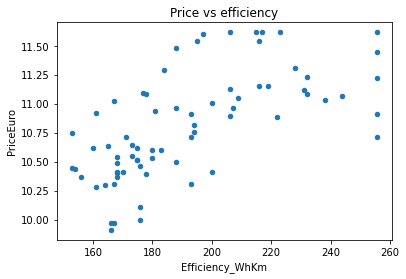

In [29]:
df.plot.scatter(x='Efficiency_WhKm', y='PriceEuro', title='Price vs efficiency')

### Homoscedasticity 

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

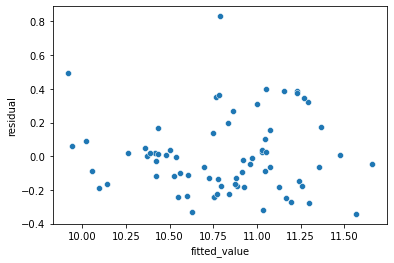

In [30]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

### Normality 

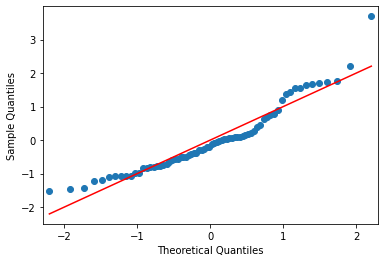

In [31]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

### Model error

<AxesSubplot:ylabel='Frequency'>

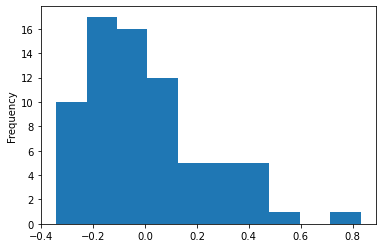

In [32]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [33]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
21,5.1,217.0,425.0,171.0,10.978831
57,12.6,135.0,130.0,164.0,10.118196
89,9.0,160.0,320.0,181.0,10.532096
95,7.3,160.0,340.0,171.0,10.479398
36,7.5,160.0,270.0,193.0,10.819778


In [35]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro,Prediction
21,5.1,217.0,425.0,171.0,10.978831,11.113549
57,12.6,135.0,130.0,164.0,10.118196,9.989422
89,9.0,160.0,320.0,181.0,10.532096,10.586427
95,7.3,160.0,340.0,171.0,10.479398,10.785624
36,7.5,160.0,270.0,193.0,10.819778,10.681930


# Test

In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.PriceEuro, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.59
